In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
types = {
    'HasCrCard':bool,
    'IsActiveMember':bool
}
train = pd.read_csv('data/train.csv', index_col='id', dtype=types)
test = pd.read_csv('data/test.csv', index_col='id', dtype=types)

In [51]:
train.shape, test.shape

((165034, 13), (110023, 12))

# Comparaison de la distribution du train et du test

In [52]:
# Je flag les dataset train et test pour ensuite les concat ensembles pour analyser l'ensemble complet des données qualitatives
train.insert(0,'origin','train')
test.insert(0,'origin','test')

In [53]:
data = pd.concat([train,test], axis=0)

In [54]:
# drop les columns qui ne semple pas utile pour la problématique
data.drop(columns=['CustomerId','Surname'], inplace=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275057 entries, 0 to 275056
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   origin           275057 non-null  object 
 1   CreditScore      275057 non-null  int64  
 2   Geography        275057 non-null  object 
 3   Gender           275057 non-null  object 
 4   Age              275057 non-null  float64
 5   Tenure           275057 non-null  int64  
 6   Balance          275057 non-null  float64
 7   NumOfProducts    275057 non-null  int64  
 8   HasCrCard        275057 non-null  bool   
 9   IsActiveMember   275057 non-null  bool   
 10  EstimatedSalary  275057 non-null  float64
 11  Exited           165034 non-null  float64
dtypes: bool(2), float64(4), int64(3), object(3)
memory usage: 23.6+ MB


## Qualitatives

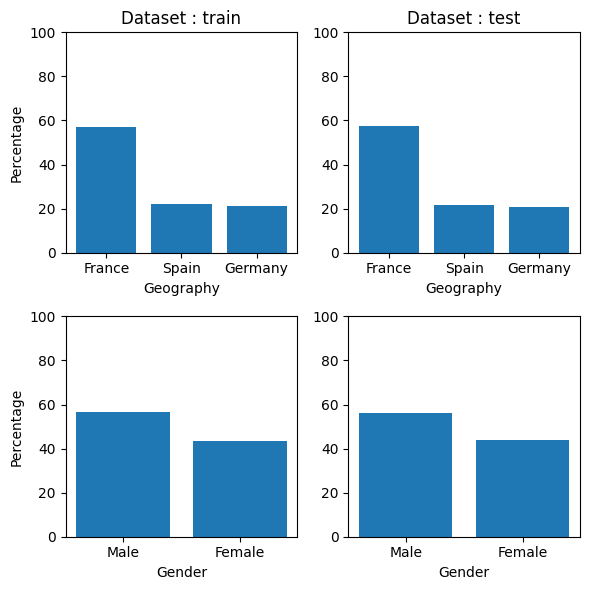

In [56]:
_ , axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

for x, origin in enumerate(data['origin'].unique()):
    axes[0,x].set_title(f'Dataset : {origin}') 
    for y, column in enumerate(data.select_dtypes('object').columns[1:]) :
        subset_data = data[data.origin == origin][column].value_counts(normalize=True)*100
        axes[y,x].bar(subset_data.index, subset_data)
        axes[y,x].set_xlabel(column)
        axes[y,x].set_ylim(0, 100)
        axes[y,0].set_ylabel('Percentage')
plt.tight_layout()
plt.show()

## BOOLEAN

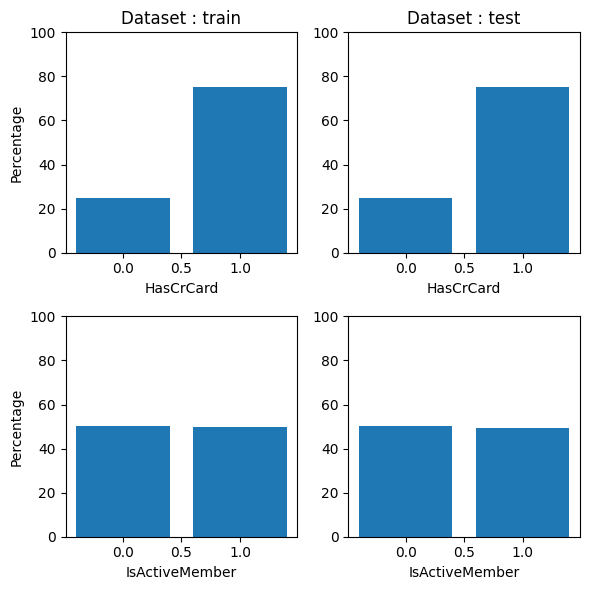

In [57]:
_ , axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

for x, origin in enumerate(data['origin'].unique()):
    axes[0,x].set_title(f'Dataset : {origin}') 
    for y, column in enumerate(data.select_dtypes('bool').columns) :
        subset_data = data[data.origin == origin][column].value_counts(normalize=True)*100
        axes[y,x].bar(subset_data.index, subset_data)
        axes[y,x].set_xlabel(column)
        axes[y,x].set_ylim(0, 100)
        axes[y,0].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

## Quantitatives

In [58]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,165034.000000
mean,656.484939,38.124415,5.010867,55420.296450,1.554002,112470.952558,0.211599
std,80.188100,8.864927,2.806173,62805.933171,0.546178,50286.608747,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,117848.090000,0.000000
75%,710.000000,42.000000,7.000000,120037.960000,2.000000,154871.130000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


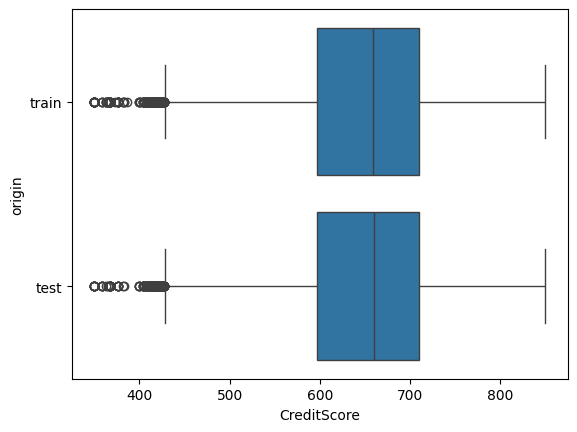

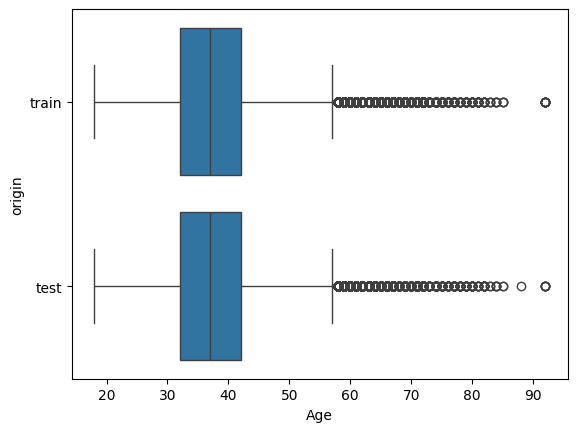

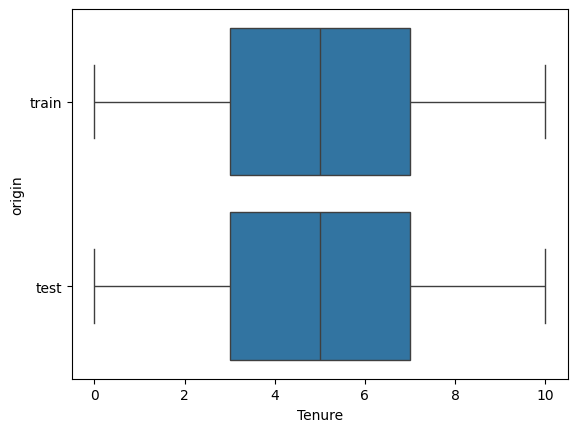

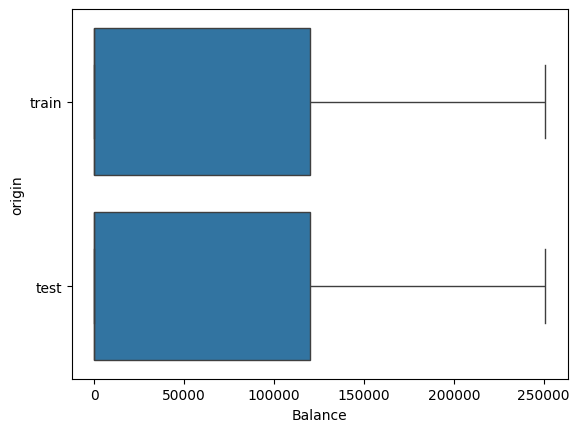

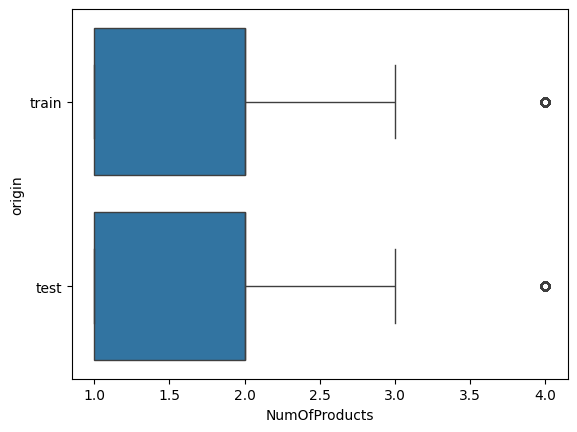

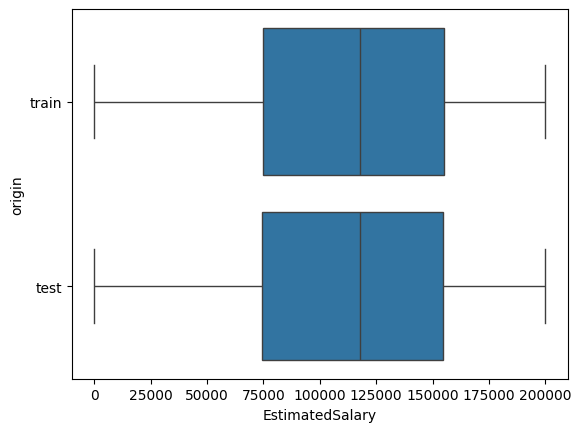

In [59]:
for column in data.select_dtypes('number').columns[:-1] :
    sns.boxplot(data, x=column, y='origin')
    plt.show()

# Analyse du churn en fonction des features

In [64]:
train[train.CustomerId == 15682355]

,origin,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,,
273,train,15682355,Hsueh,727,Germany,Male,35.0,9,140966.55,1,True,True,179227.21,0
2565,train,15682355,Tien,744,France,Male,37.0,6,0.00,2,True,True,137944.16,0
5063,train,15682355,Niu,790,Spain,Male,44.0,1,128100.75,1,True,False,164517.96,1
11942,train,15682355,Hsueh,616,France,Female,43.0,9,95167.82,2,False,True,132741.56,0
13009,train,15682355,Manna,652,Spain,Female,33.0,7,0.00,2,True,True,112333.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159573,train,15682355,Onwuatuegwu,679,France,Female,39.0,6,0.00,2,True,False,123977.86,0
159690,train,15682355,Pinto,629,Germany,Female,34.0,2,140510.34,2,True,False,143681.75,0
159923,train,15682355,O'Donnell,710,France,Female,35.0,7,0.00,2,True,True,147055.87,0


In [43]:
train.drop(columns=['origin','CustomerId','Surname'], inplace=True)

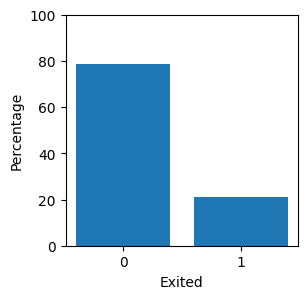

In [44]:
_ , axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
subset_data = train.Exited.value_counts(True)*100
axes.bar(subset_data.index, subset_data)
axes.set_xlabel('Exited')
axes.set_ylabel('Percentage')
axes.set_ylim(0, 100)
axes.set_xticks(subset_data.index)

plt.show()

**target unbalanced**

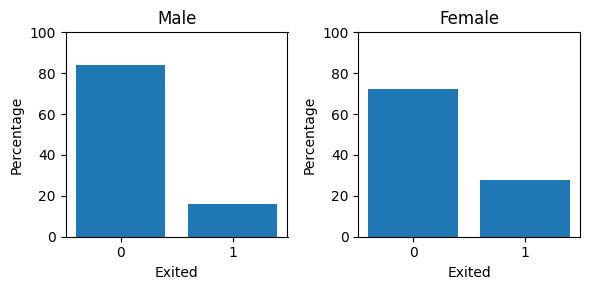

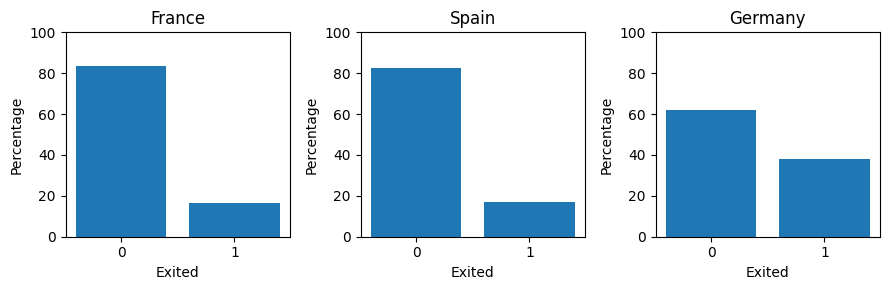

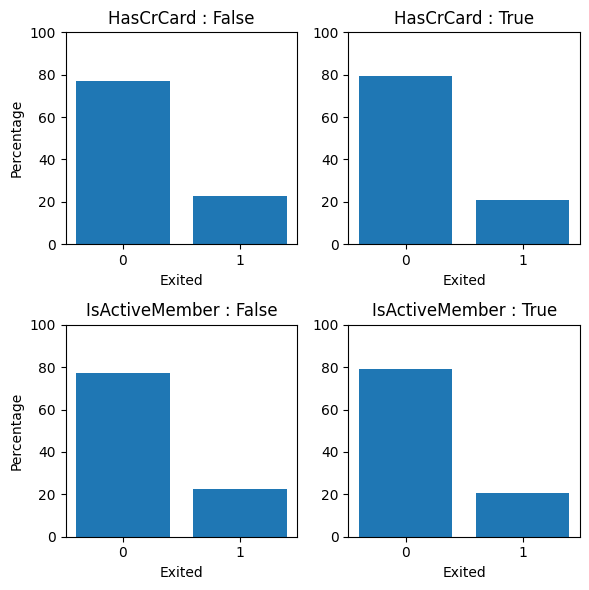

In [45]:
_ , axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

for x, gender in enumerate(train.Gender.unique()) :
    axes[x].set_title(f'{gender}') 
    subset_data = train[train.Gender == gender].Exited.value_counts(True)*100
    axes[x].bar(subset_data.index, subset_data)
    axes[x].set_xlabel('Exited')
    axes[x].set_ylabel('Percentage')
    axes[x].set_ylim(0, 100)
    axes[x].set_xticks(subset_data.index)
plt.tight_layout()
plt.show()

_ , axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
for x, geography in enumerate(train.Geography.unique()) :
    axes[x].set_title(f'{geography}') 
    subset_data = train[train.Geography == geography].Exited.value_counts(True)*100
    axes[x].bar(subset_data.index, subset_data)
    axes[x].set_xlabel('Exited')
    axes[x].set_ylabel('Percentage')
    axes[x].set_ylim(0, 100)
    axes[x].set_xticks(subset_data.index)
plt.tight_layout()
plt.show()

_ , axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

for y, column in enumerate(train.select_dtypes(bool).columns) :
    for x, BOOLEAN in enumerate([False,True]) :
        axes[y,x].set_title(f'{column} : {BOOLEAN}') 
        subset_data = train[train.HasCrCard == BOOLEAN].Exited.value_counts(True)*100
        axes[y,x].bar(subset_data.index, subset_data)
        axes[y,x].set_xlabel('Exited')
        axes[y,0].set_ylabel('Percentage')
        axes[y,x].set_ylim(0, 100)
        axes[y,x].set_xticks(subset_data.index)

plt.tight_layout()
plt.show()

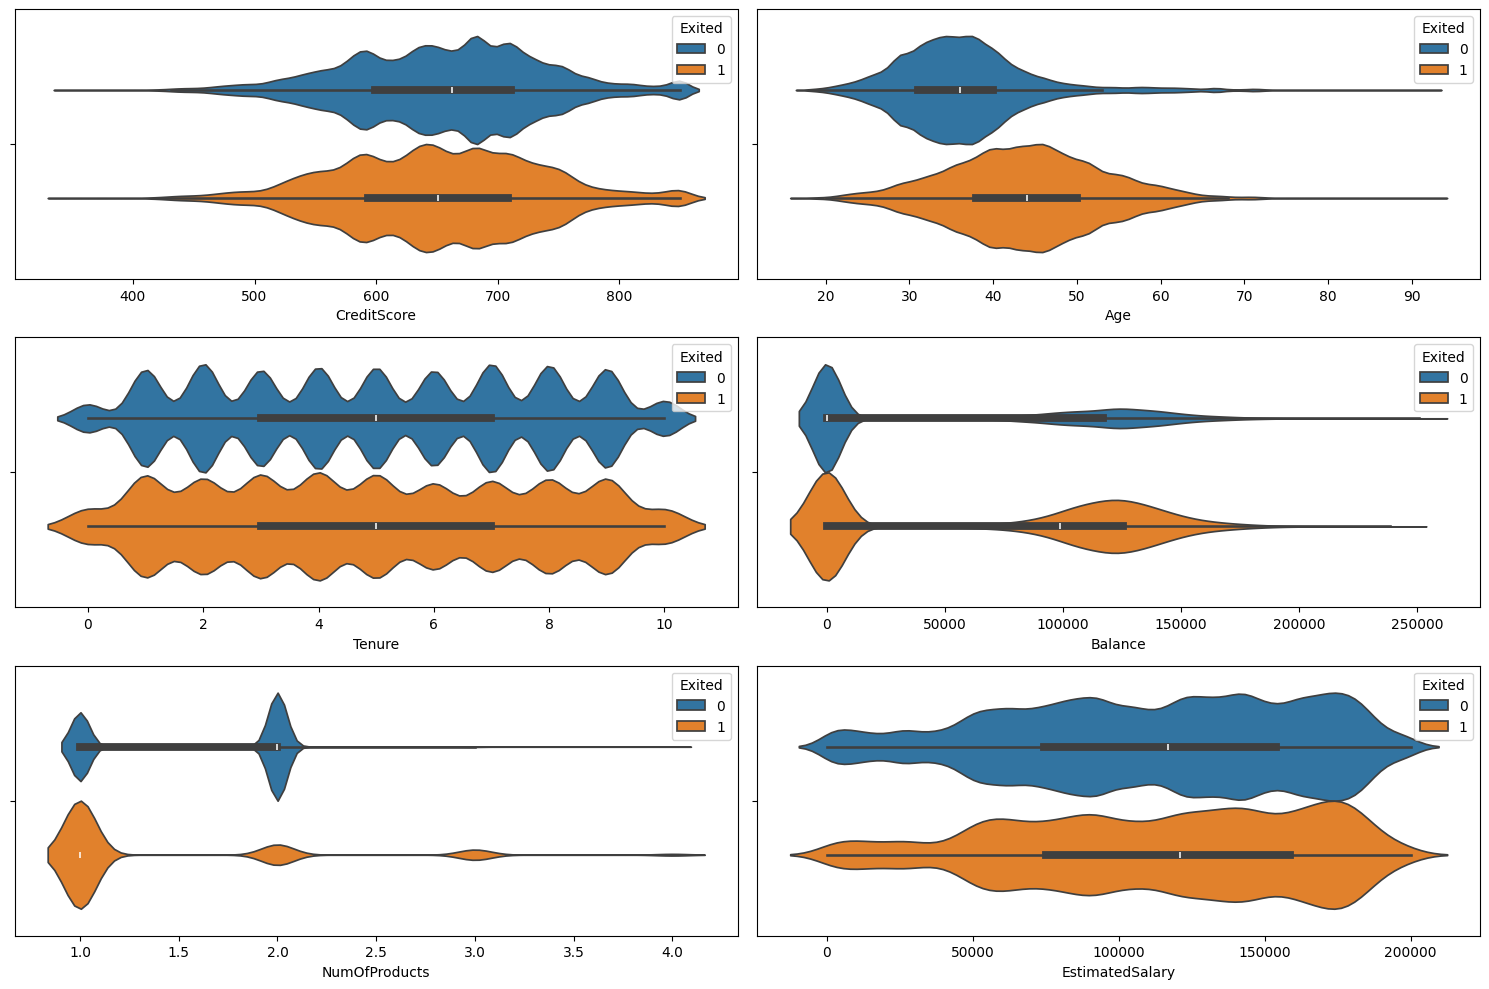

In [46]:
_, axes = plt.subplots(3, 2, figsize=(15, 10))

axes = axes.flatten()
for i, column in enumerate(train.select_dtypes('number').columns[:-1]):
    sns.violinplot(data=train, x=column, hue='Exited', ax=axes[i])

plt.tight_layout()
plt.show()

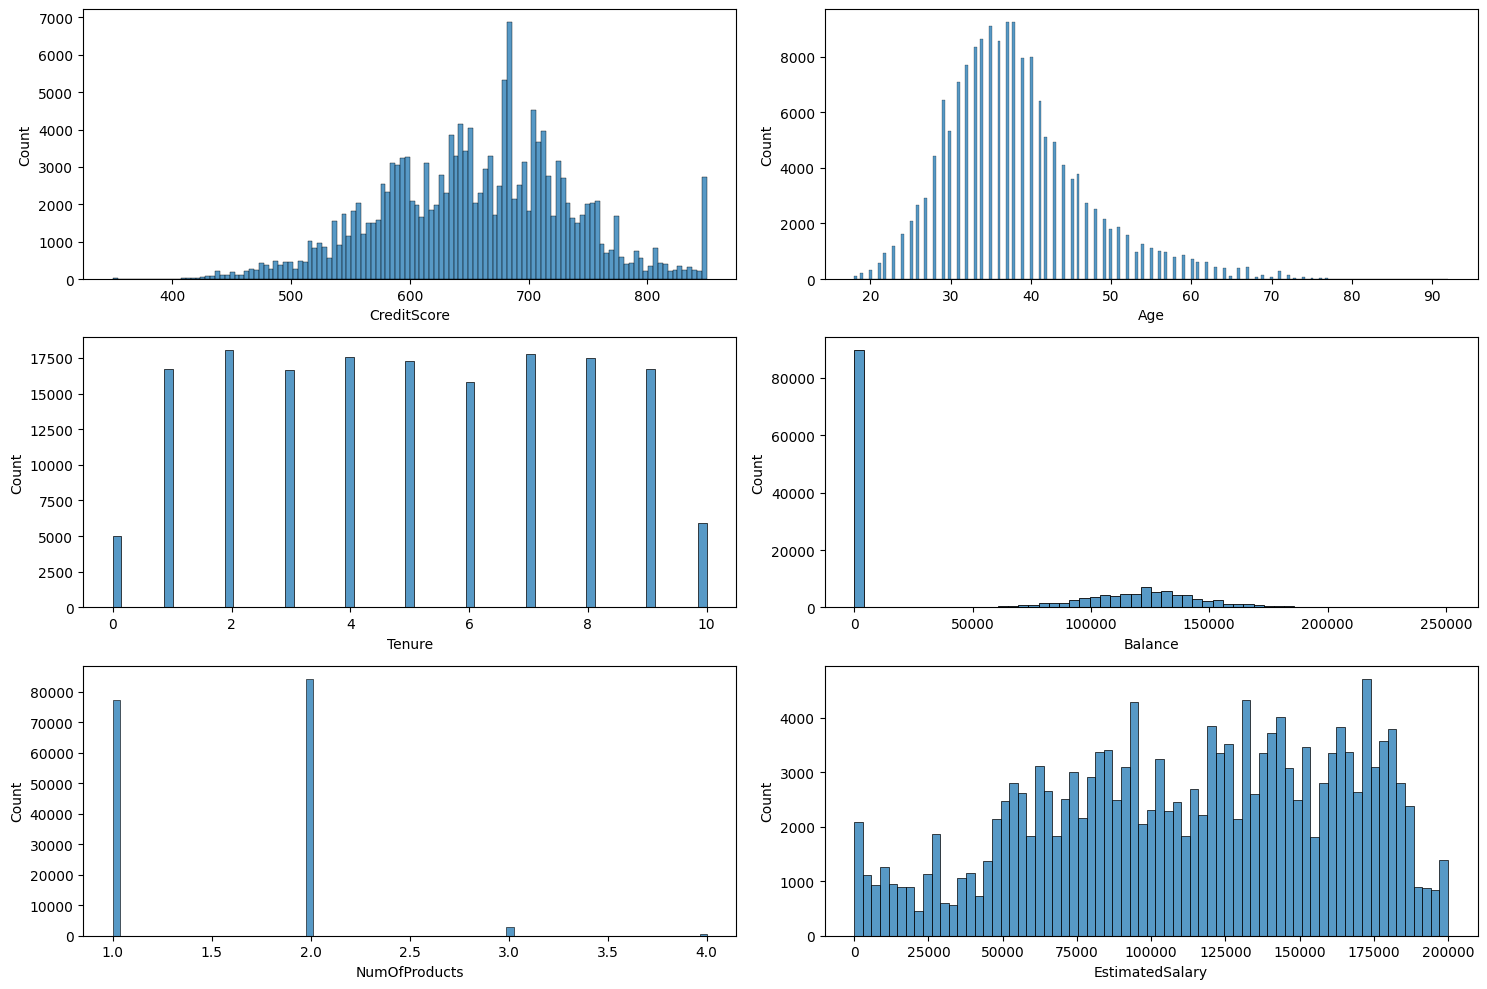

In [47]:
_, axes = plt.subplots(3, 2, figsize=(15, 10))

axes = axes.flatten()
for i, column in enumerate(train.select_dtypes('number').columns[:-1]):
    sns.histplot(data=train, x=column, ax=axes[i])

plt.tight_layout()
plt.show()

<Axes: xlabel='Balance', ylabel='Count'>

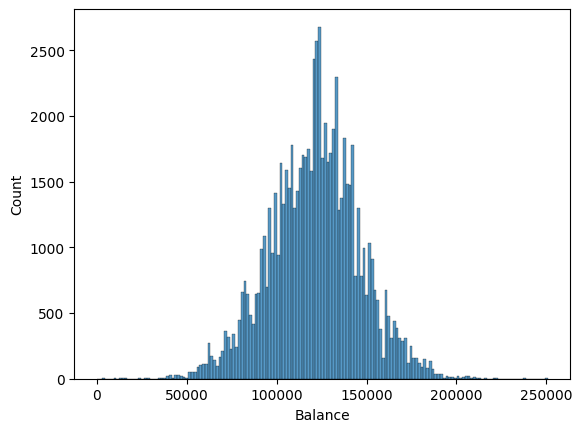

In [48]:
sns.histplot(train[train.Balance != 0], x='Balance')